In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [2]:
df=pd.read_csv('RowFinal1.csv')
A=df.drop('Label',axis=1)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(A, df.Label, test_size=0.3, random_state=1) # 70% training and 30% test


In [3]:


# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [4]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8389393733893937


In [5]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.8310238127270281
Recall: 0.8466282894736842


In [6]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np
from sklearn.metrics import classification_report, make_scorer, accuracy_score
# cv=10 represents the StratifiedKFold with 10 folds
x1=[];
def cls_rep(y_true,y_pred):
    
    print ('\n\nCross validation metrics :\n'
           
           
           ,classification_report(y_true, y_pred))
    x1.append(classification_report(y_true, y_pred, output_dict = True, digits = 2))
    
    return accuracy_score(y_true,y_pred)


scores1 = cross_val_score(clf, X=X_train, y=y_train, cv=10, n_jobs=1, scoring = make_scorer(cls_rep))

 
print('Cross Validation scores: %s' % scores1)
 
print('\n\nCross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores1),np.std(scores1)))



Cross validation metrics :
               precision    recall  f1-score   support

         0.0       0.82      0.80      0.81      1713
         1.0       0.81      0.83      0.82      1728

    accuracy                           0.82      3441
   macro avg       0.82      0.82      0.82      3441
weighted avg       0.82      0.82      0.82      3441



Cross validation metrics :
               precision    recall  f1-score   support

         0.0       0.84      0.83      0.83      1713
         1.0       0.83      0.84      0.84      1728

    accuracy                           0.83      3441
   macro avg       0.83      0.83      0.83      3441
weighted avg       0.83      0.83      0.83      3441



Cross validation metrics :
               precision    recall  f1-score   support

         0.0       0.81      0.82      0.82      1713
         1.0       0.82      0.81      0.82      1728

    accuracy                           0.82      3441
   macro avg       0.82      0.82     

[[6194 1256]
 [1119 6177]]


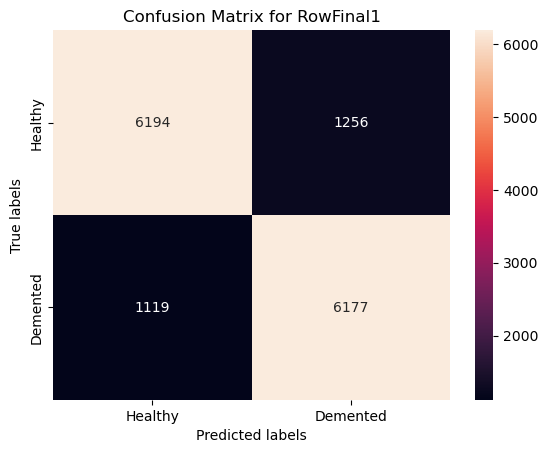

In [7]:
from sklearn.metrics import confusion_matrix as cm

m2 = cm(y_test,y_pred)
print(m2)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


ax= plt.subplot()
sns.heatmap(m2, annot=True, fmt='g', ax=ax); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for RowFinal1'); 
ax.xaxis.set_ticklabels(['Healthy', 'Demented']); ax.yaxis.set_ticklabels(['Healthy', 'Demented']);

In [10]:
x1 = pd.DataFrame(x1,index=None)

f1 = ["Label:0",parse(x1['0.0'])]
f2 = ["Label:1",parse(x1['1.0'])]
f3 = ["Accuracy",(x1['accuracy'])]
f4 = ["Macro Avg",parse(x1['macro avg'])]
f5 = ["Weighted Avg",parse(x1['weighted avg'])]
f6 = ["Avg Accuracy",'%.3f +/- %.3f' % (np.mean(scores1),np.std(scores1))]
f = (f1,f2,f3,f4,f5,f6)

f = pd.DataFrame(f, columns = ['Types','Rows'], index = None)

print(f.shape)
f.to_csv('KNNRows.csv',index=None)

(10, 2)
